In [28]:
conda install seaborn

Channels:
 - defaults
Platform: linux-64

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d7240d24d90>: Failed to resolve 'repo.anaconda.com' ([Errno -3] Temporary failure in name resolution)")': /pkgs/r/linux-64/repodata.json.zst

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d7240d13310>: Failed to resolve 'repo.anaconda.com' ([Errno -3] Temporary failure in name resolution)")': /pkgs/main/noarch/repodata.json.zst

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d7240d131d0>: Failed to resolve 'repo.anaconda.com' ([Errno -3] Temporary failure in name resolution)")': /pkgs/r/noarch/repodata.json.zst

/ 

In [29]:
import pandas as pd
df = pd.read_csv("car_sales.csv")
print(df.head())
print(df.isnull().sum())
df["Fuel efficiency"]=df["Fuel efficiency"].fillna(df["Fuel efficiency"].mean())
print(df.isnull().sum())

    Manufacturer              Model  Sales in thousands  4-year resale value  \
0  Acura          Integra                        16.919               16.360   
1  Acura          TL                             39.384               19.875   
2  Acura          CL                             14.114               18.225   
3  Acura          RL                              8.588               29.725   
4  Audi           A4                             20.397               22.255   

  Vehicle type  Price in thousands  Engine size  Horsepower  Wheelbase  Width  \
0    Passenger               21.50          1.8       140.0      101.2   67.3   
1    Passenger               28.40          3.2       225.0      108.1   70.3   
2    Passenger                 NaN          3.2       225.0      106.9   70.6   
3    Passenger               42.00          3.5       210.0      114.6   71.4   
4    Passenger               23.99          1.8       150.0      102.6   68.2   

   Length  Curb weight  Fuel cap

In [30]:
attributes = df.shape[1]
print("Number of attributes:",attributes)

Number of attributes: 15


In [31]:
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  121 non-null    float64
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   155 non-null    float64
 6   Engine size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb weight          155 non-null    float64
 12  Fuel capacity        156 non-null    float64
 13  Fuel efficiency      157 non-null    float64
 14  Latest Launch        157 non-null    object 
dtypes: float64(11), object(4

In [32]:
num_rows,num_colms = df.shape
print("Number of rows:",num_rows)
print("Number of columns:",num_colms)

Number of rows: 157
Number of columns: 15


In [33]:
clean = df.drop_duplicates()
print("Number of rows before dropping:", df.shape[0])
print("Number of rows after dropping:", clean.shape[0])

Number of rows before dropping: 157
Number of rows after dropping: 157


In [34]:
print("Summary of data:",df.describe())

Summary of data:        Sales in thousands  4-year resale value  Price in thousands  \
count          157.000000           121.000000          155.000000   
mean            52.998076            18.072975           27.390755   
std             68.029422            11.453384           14.351653   
min              0.110000             5.160000            9.235000   
25%             14.114000            11.260000           18.017500   
50%             29.450000            14.180000           22.799000   
75%             67.956000            19.875000           31.947500   
max            540.561000            67.550000           85.500000   

       Engine size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25

In [35]:
print("Number of missing values in each column:",df.isnull().sum())

Number of missing values in each column: Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         0
Latest Launch           0
dtype: int64


In [36]:
print("Most missing values from the column:",df.isnull().sum().idxmax())

Most missing values from the column: 4-year resale value


In [37]:
print(df.isnull().sum())

Manufacturer            0
Model                   0
Sales in thousands      0
4-year resale value    36
Vehicle type            0
Price in thousands      2
Engine size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb weight             2
Fuel capacity           1
Fuel efficiency         0
Latest Launch           0
dtype: int64


In [38]:
def find_min_max(df,Horsepower):
    min_value = df[Horsepower].min()
    max_value = df[Horsepower].max()

    min_row = df[df[Horsepower] == min_value]
    max_row = df[df[Horsepower] == max_value]

    return min_value,max_value,min_row,max_row

hp_min, hp_max, hp_min_row, hp_max_row = find_min_max(df,"Horsepower")
print("\nHorsepower - Min:", hp_min, "\n", hp_min_row)
print("\nHorsepower - Max:", hp_max, "\n", hp_max_row)


Horsepower - Min: 55.0 
      Manufacturer              Model  Sales in thousands  4-year resale value  \
26  Chevrolet      Metro                          21.855                 5.16   

   Vehicle type  Price in thousands  Engine size  Horsepower  Wheelbase  \
26    Passenger               9.235          1.0        55.0       93.1   

    Width  Length  Curb weight  Fuel capacity  Fuel efficiency Latest Launch  
26   62.6   149.4        1.895           10.3             45.0     13-Apr-14  

Horsepower - Max: 450.0 
      Manufacturer              Model  Sales in thousands  4-year resale value  \
39  Dodge          Viper                           0.916                58.47   

   Vehicle type  Price in thousands  Engine size  Horsepower  Wheelbase  \
39    Passenger              69.725          8.0       450.0       96.2   

    Width  Length  Curb weight  Fuel capacity  Fuel efficiency Latest Launch  
39   75.7   176.7        3.375           19.0             16.0      8-Jul-15  


In [39]:
from scipy.stats import gaussian_kde
df.columns = df.columns.str.strip()
print("1.",df.columns)
if "Length" in df.columns:
  df["Length"] = pd.to_numeric(df["Length"], errors="coerce")
  data = df["Length"].dropna()
  print("2.",data)
  kde = gaussian_kde(data)
  print("3.",kde)
  density_values = kde.evaluate(data)
  result = pd.DataFrame({'Length': data, 'Density': density_values})
  print(result.head())
else:
  print("Error: 'Length' column not found in the dataset.")

1. Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
2. 0      172.4
1      192.9
2      192.0
3      196.6
4      178.0
       ...  
152    176.6
153    185.9
154    186.2
155    185.7
156    189.8
Name: Length, Length: 156, dtype: float64
3. <scipy.stats._kde.gaussian_kde object at 0x7fc443ddbed0>
   Length   Density
0   172.4  0.016206
1   192.9  0.027570
2   192.0  0.028122
3   196.6  0.023728
4   178.0  0.023772


In [40]:
manufacturer_counts = df.groupby('Manufacturer').size().reset_index(name='Count')
#print(df.groupby('Manufacturer').size())
print(manufacturer_counts)

     Manufacturer  Count
0   Acura              4
1   Audi               3
2   BMW                3
3   Buick              4
4   Cadillac           5
5   Chevrolet          9
6   Chrysler           7
7   Dodge             11
8   Ford              11
9   Honda              5
10  Hyundai            3
11  Infiniti           1
12  Jaguar             1
13  Jeep               3
14  Lexus              6
15  Lincoln            3
16  Mercedes-Benz      9
17  Mercury            6
18  Mitsubishi         7
19  Nissan             7
20  Oldsmobile         6
21  Plymouth           4
22  Pontiac            6
23  Porsche            3
24  Saab               2
25  Saturn             5
26  Subaru             2
27  Toyota             9
28  Volkswagen         6
29  Volvo              6


['Sales in thousands', '4-year resale value', 'Price in thousands', 'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity', 'Fuel efficiency']


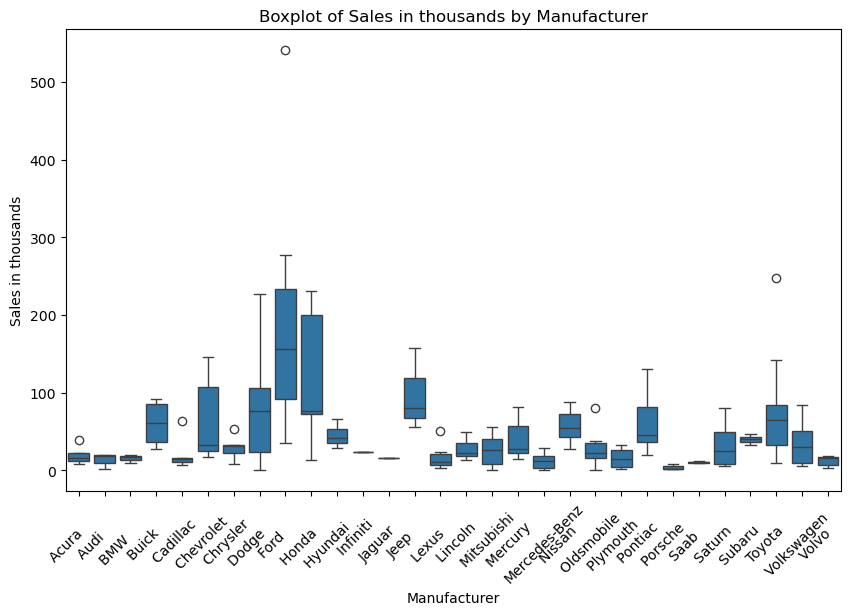

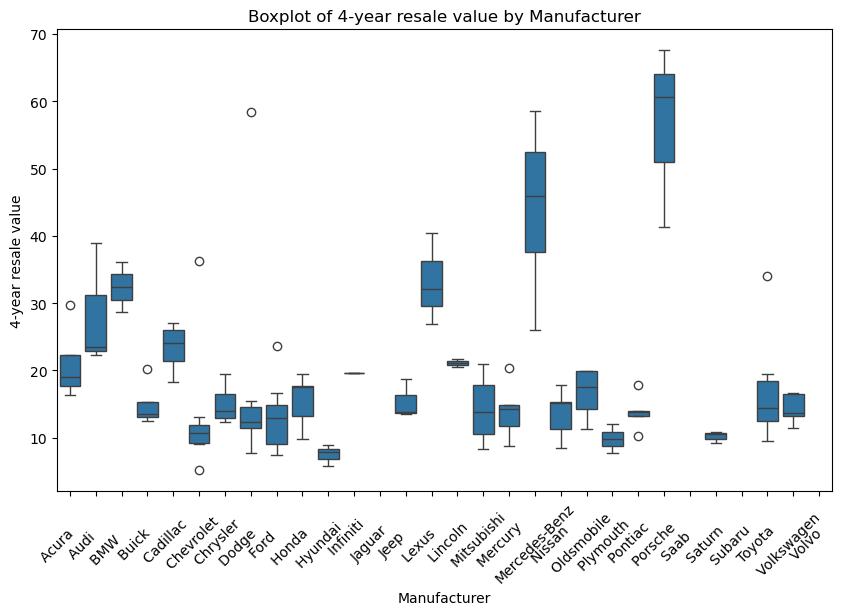

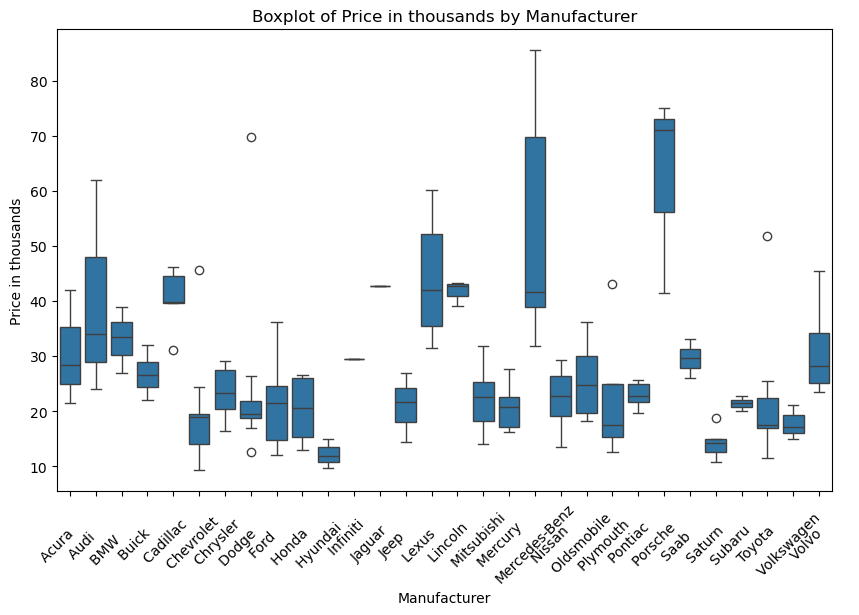

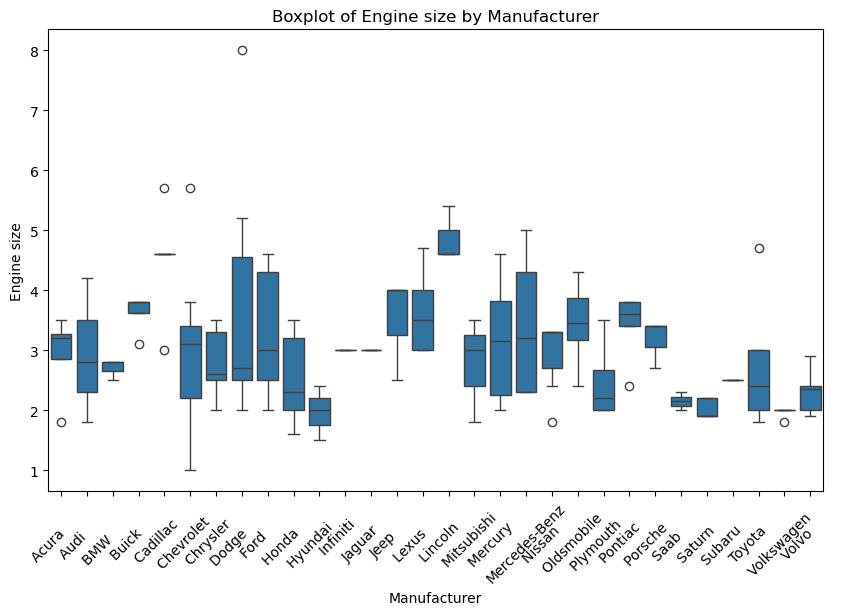

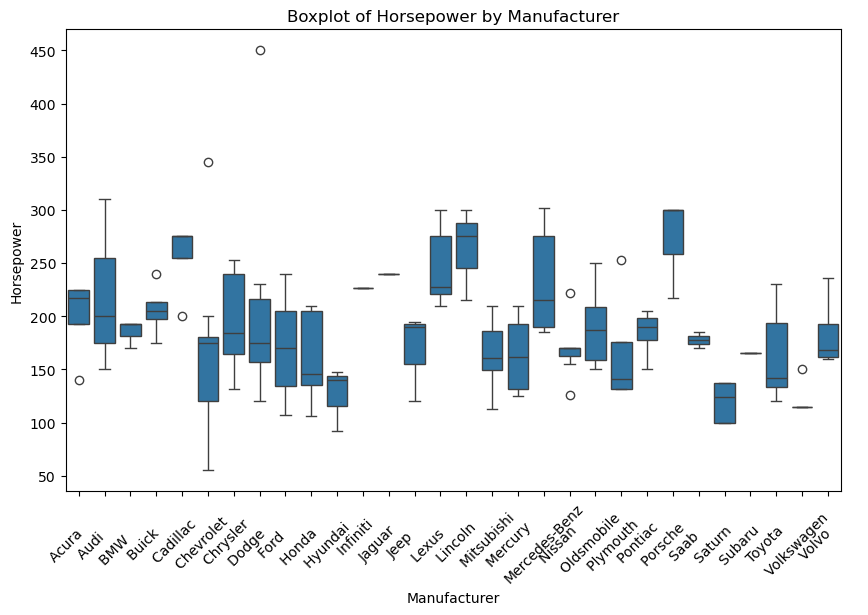

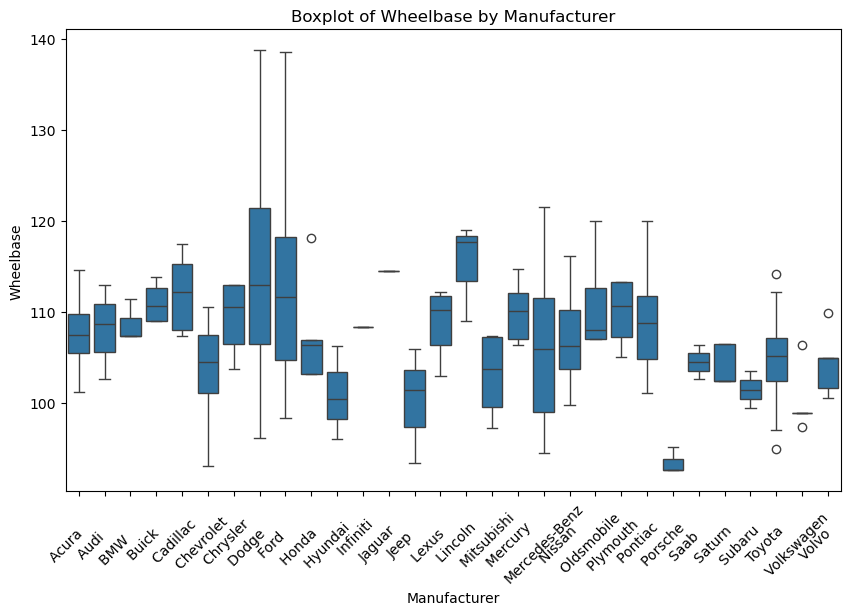

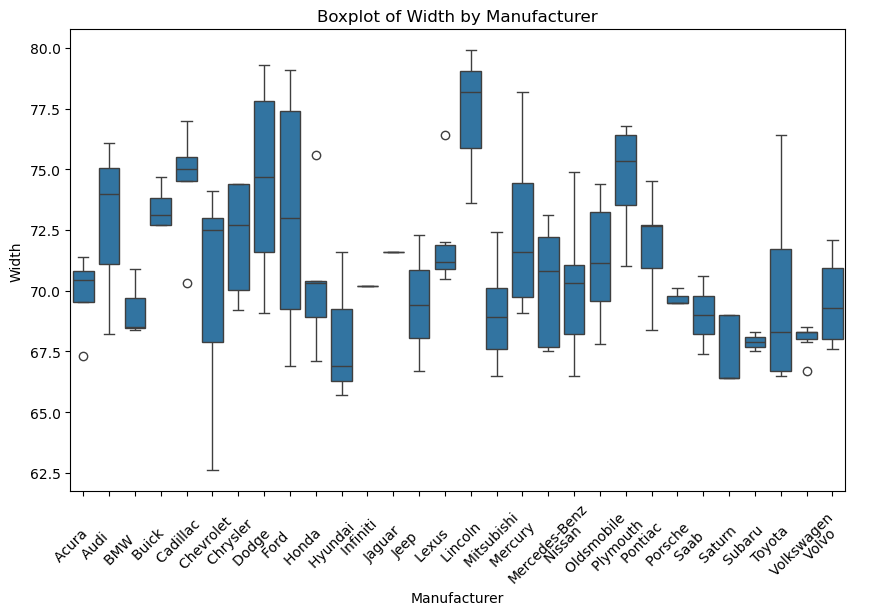

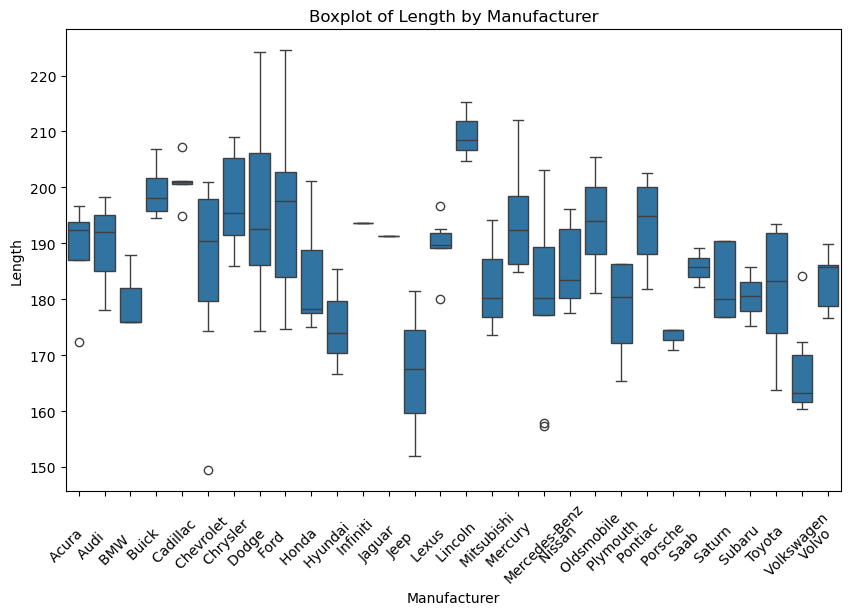

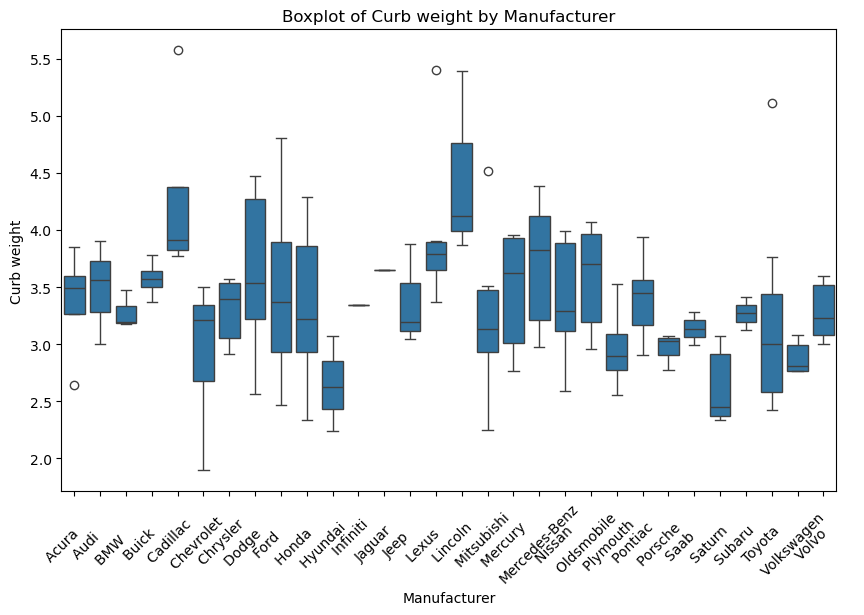

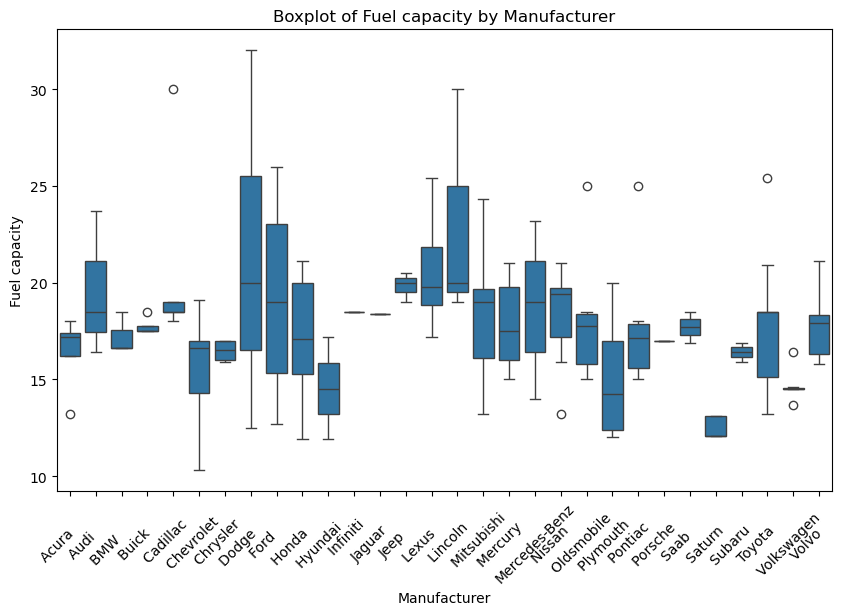

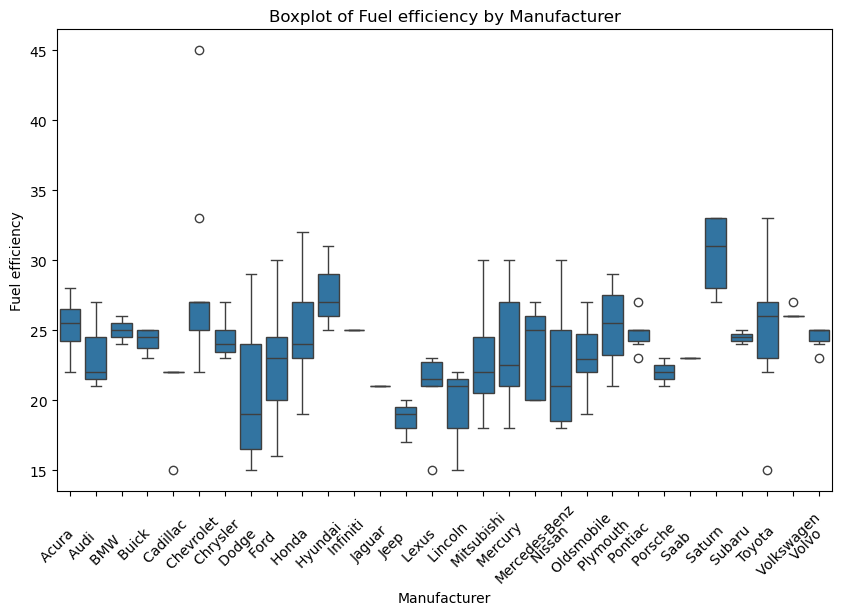

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip()
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col !='Manufacturer']
print(numerical_columns)

if 'Manufacturer' in df.columns:
  for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Manufacturer', y=col, data=df)
    plt.title(f'Boxplot of {col} by Manufacturer')
    plt.xlabel('Manufacturer')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()
else:
  print("Error: 'Manufacturer' column not found in the dataset.")


In [42]:
print(df.columns)
sales_column = [col for col in df.columns if 'sales' in col.lower()]
if not sales_column:
  raise KeyError("No column related to 'sales' found in the dataset. Please check the column names.")
sales_column_name = sales_column[0]
print(f"Using column '{sales_column_name}' as the sales column.")
y = df[sales_column_name]
X = df.drop(columns=[sales_column_name])
print("\nShape of X (input):", X.shape)
print("Shape of y (output):", y.shape)
print("\nInput (X):")
print(X.head())
print("\nOutput (y):")
print(y.head())

Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
Using column 'Sales in thousands' as the sales column.

Shape of X (input): (157, 14)
Shape of y (output): (157,)

Input (X):
    Manufacturer              Model  4-year resale value Vehicle type  \
0  Acura          Integra                         16.360    Passenger   
1  Acura          TL                              19.875    Passenger   
2  Acura          CL                              18.225    Passenger   
3  Acura          RL                              29.725    Passenger   
4  Audi           A4                              22.255    Passenger   

   Price in thousands  Engine size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.

In [44]:
from sklearn.preprocessing import LabelEncoder
print(df.columns)
sales_column = [col for col in df.columns if 'sales' in col.lower()]
if not sales_column:
  raise KeyError("No column related to 'sales' found in the dataset. Please check the column names.")
sales_column_name = sales_column[0]
print(f"Using column '{sales_column_name}' as the sales column.")
y = df[sales_column_name]
X = df.drop(columns=[sales_column_name])
categorical_columns = X.select_dtypes(include=['object','category']).columns
label_encoders = {}
for col in categorical_columns:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])
  label_encoders[col] = le
print("\nShape of X (input):", X.shape)
print("Shape of y (output):", y.shape)
print("\nInput (X) with encoded categorical variables:")
print(X.head())
print("\nOutput (y):")
print(y.head())

for col in categorical_columns:
  print(f"\nMapping for {col}:")
  print(dict(zip(label_encoders[col].classes_,label_encoders[col].transform(label_encoders[col].classes_))))

Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch'],
      dtype='object')
Using column 'Sales in thousands' as the sales column.

Shape of X (input): (157, 14)
Shape of y (output): (157,)

Input (X) with encoded categorical variables:
   Manufacturer  Model  4-year resale value  Vehicle type  Price in thousands  \
0             0     79               16.360             1               21.50   
1             0    143               19.875             1               28.40   
2             0     25               18.225             1                 NaN   
3             0    115               29.725             1               42.00   
4             1      8               22.255             1               23.99   

   Engine size  Horsepower  Wheelbase  Width  Length  Curb weigh